# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
### <span style='font-family:"Times New Roman"'>In this problem, local histogram equalization on image with hidden symbols is used and results were compared to global histogram equalization. 

# <span style='font-family:"Times New Roman"'>Loading required modules:

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
from skimage.filters import rank
from skimage.morphology import disk

# <span style='font-family:"Times New Roman"'>Reading image:

In [2]:
I = mpimg.imread('hidden-symbols.tif')

# <span style='font-family:"Times New Roman"'>Displaying image:

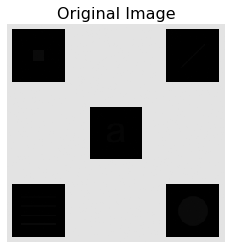

In [3]:
img=plt.imshow(I,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.show()

# <span style='font-family:"Times New Roman"'>Global Histogram Equalization:

In [4]:
Ieq = exposure.equalize_hist(I)

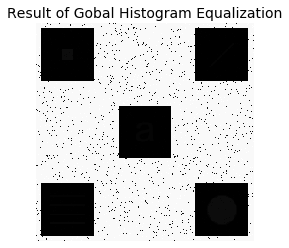

In [5]:
img=plt.imshow(Ieq,cmap='gray')
plt.title('Result of Gobal Histogram Equalization', fontsize = 14)
plt.axis('off')
plt.show()

# <span style='font-family:"Times New Roman"'>Local Histogram Equalization:

In [6]:
n = 10
Izpad = np.pad(I, ((n,n),(n,n)), 'constant')
Ieqa = exposure.equalize_adapthist(Izpad, kernel_size=3, clip_limit=1, nbins=256)
Ieqa = np.delete(Ieqa, range(n), axis=1)
Ieqa = np.delete(Ieqa, range(256, 256 + n), axis=1)
Ieqa = np.delete(Ieqa, range(n), axis=0)
Ieqa = np.delete(Ieqa, range(256, 256 + n), axis=0)

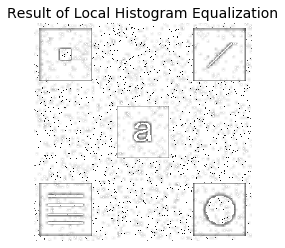

In [7]:
img=plt.imshow(Ieqa,cmap='gray')
plt.title('Result of Local Histogram Equalization', fontsize = 14)
plt.axis('off')
plt.show()

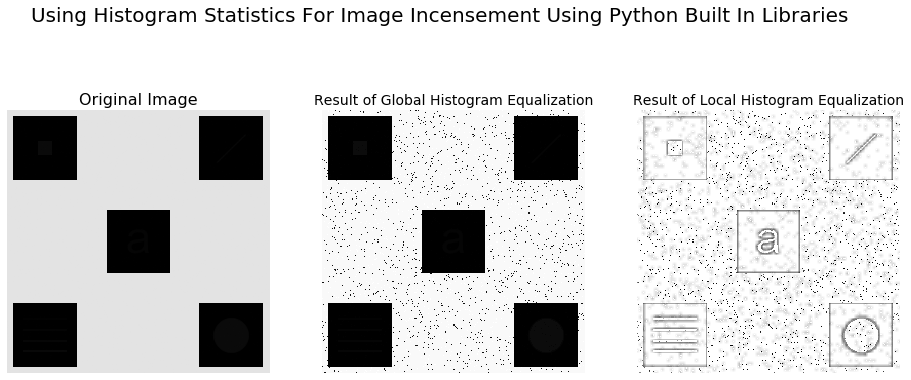

In [8]:
fig = plt.figure(figsize=(16, 12))
plt.subplot(2, 3, 1)
img=plt.imshow(I,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 3, 2)
img=plt.imshow(Ieq,cmap='gray')
plt.title('Result of Global Histogram Equalization', fontsize = 14)
plt.axis('off')
plt.subplot(2, 3, 3)
img=plt.imshow(Ieqa,cmap='gray')
plt.title('Result of Local Histogram Equalization', fontsize = 14)
plt.axis('off')
fig.suptitle('Using Histogram Statistics For Image Incensement Using Python Built In Libraries', fontsize = 20)
plt.show()

# <span style='font-family:"Times New Roman"'>Local Histogram Equalization With Different Method:

In [9]:
n = 10
I2zpad = np.pad(I, ((n,n),(n,n)), 'constant')
selem = disk(3)
img_eq = rank.equalize(I2zpad, selem=selem)
img_eq = np.delete(img_eq, range(n), axis=1)
img_eq = np.delete(img_eq, range(256, 256 + n), axis=1)
img_eq = np.delete(img_eq, range(n), axis=0)
img_eq = np.delete(img_eq, range(256, 256 + n), axis=0)

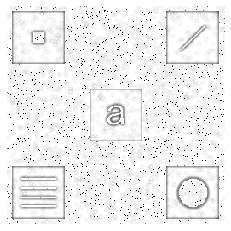

In [10]:
img=plt.imshow(img_eq,cmap='gray')
plt.axis('off')
plt.show()

# <span style='font-family:"Times New Roman"'>Global Histogram Equalization Using Written Function:

In [11]:
def Histeq(image, number_bins=256):
    I = image.flatten()
    np.pad(I, (2, 3), 'constant')
    imhist, bins = np.histogram(I, number_bins, density=True)
    s_k = imhist.cumsum()                                # cumulative distribution function
    T = 255 * s_k / s_k[-1]                              # normalizing 

    imeq = np.interp(I, bins[:-1], T)      #Finding new pixel values

    return imeq.reshape(image.shape), T

In [12]:
Iglob , Tglob = Histeq(I)

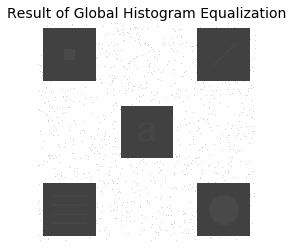

In [13]:
img=plt.imshow(Iglob,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Result of Global Histogram Equalization', fontsize = 14)
plt.axis('off')
plt.show()

# <span style='font-family:"Times New Roman"'>Local Histogram Equalization Using Written Function:

In [14]:
def Lochisteq(image, L , number_bins=256):
    
    II = image 
    n = (L-1)//2
    I = np.pad(II, ((n,n),(n,n)), 'edge')
    h = np.zeros(I.shape)
    c, r  = I.shape
    
    for j in range (0,c+1):
        for n in range (0,r+1):
            imhist, bins = np.histogram(I[L*j:L*j+L,L*n:L*n+L], number_bins, density=True)
            s_k = imhist.cumsum()                                # cumulative distribution function
            T = 255 * s_k / s_k[-1]                              # normalizing 
            imeq = np.interp(I[L*j:L*j+L,L*n:L*n+L], bins[:-1], T)      #Finding new pixel values
            h[L*j:L*j+L,L*n:L*n+L] = imeq

        
    return h

In [15]:
Ksize = 3
Ilocalhisteq = Lochisteq(I,Ksize)
c, r  = I.shape
Ilocalhisteq = np.delete(Ilocalhisteq, range((Ksize-1)//2), axis=1)
Ilocalhisteq = np.delete(Ilocalhisteq, range(r, r + (Ksize-1)//2), axis=1)
Ilocalhisteq = np.delete(Ilocalhisteq, range((Ksize-1)//2), axis=0)
Ilocalhisteq = np.delete(Ilocalhisteq, range(c, c + (Ksize-1)//2), axis=0)

C:\Users\sinaz\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


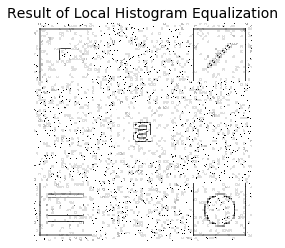

In [16]:
img=plt.imshow(Ilocalhisteq,cmap='gray')
plt.title('Result of Local Histogram Equalization', fontsize = 14)
plt.axis('off')
plt.show()

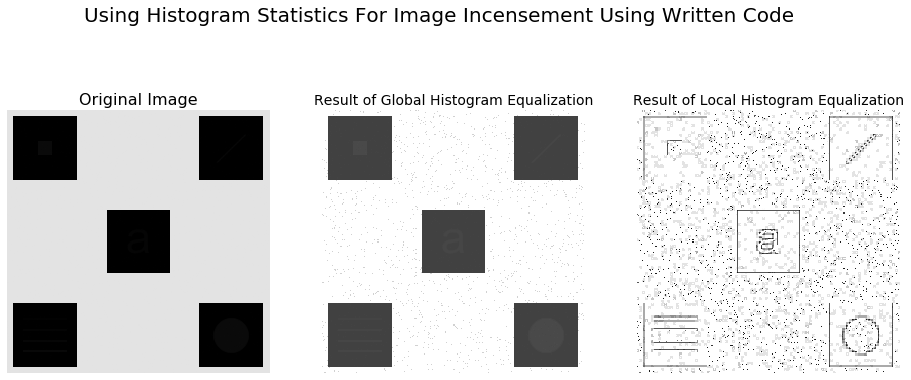

In [17]:
fig = plt.figure(figsize=(16, 12))
plt.subplot(2, 3, 1)
img=plt.imshow(I,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 3, 2)
img=plt.imshow(Iglob,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Result of Global Histogram Equalization', fontsize = 14)
plt.axis('off')
plt.subplot(2, 3, 3)
img=plt.imshow(Ilocalhisteq,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Result of Local Histogram Equalization', fontsize = 14)
plt.axis('off')
fig.suptitle('Using Histogram Statistics For Image Incensement Using Written Code', fontsize = 20)
plt.show()